Class Ex.3 by Matan Porat and Rotem Tsalisher

Guidlines:
 - All functions are implemented in the notebook
 - Names of functions are determined by the question number
 - All functions are called in the main function (last function in the notebook)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def calcGaussian(x,mu,sigma,pi = 1):
    # Calculate the denominator of the Gaussian distribution
    denominator = np.sqrt(2 * np.pi * sigma**2)
    
    # Calculate the exponent term
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    
    # Calculate the Gaussian distribution
    gaussian = (1 / denominator) * np.exp(exponent)
    
    return pi*gaussian

In [6]:
def plotGaussian(x,gauss,N=1000):
    
    plt.plot(x,gauss)
    plt.grid(visible=True)
    plt.xlabel("x")
    plt.ylabel("p(x)")
    
    return

In [7]:
def calcParams(D):
    muML = np.mean(D)
    sigmaML = np.mean((D-muML)**2)
    return muML,sigmaML;

In [8]:
def calcQDAParams(D):
    x = D[:,0]; # samples
    y = D[:,1]; # classification
    params0 = calcParams(x[y==0]);
    params1 = calcParams(x[y==1]);
    pi1 = sum(y)/len(y)
    pi0 = 1-pi1
    
    mu = np.array([params0[0], params1[0]]);
    sig = np.sqrt(np.array([params0[1], params1[1]]));
    pi = np.array([pi0,pi1]);
    
    return mu,sig,pi

In [9]:
def calcBayes(x0,mu,sig,pi):
    #apply Bayes formula:
    px0_y0 = calcGaussian(x0,mu[0],sig[0],pi[0]); 
    px0_y1 = calcGaussian(x0,mu[1],sig[1],pi[1]);
    p0 = (pi[0]*px0_y0)/(pi[0]*px0_y0 + pi[1]*px0_y1);
    
    return p0;
    

In [10]:
def q3(mu,sig,pi):
    a = 4;
    N = 1000;
    gauss = np.zeros((3,N));
    x = np.linspace(min(mu-a*sig),max(mu+a*sig),N);
    for i in range(2):
        gauss[i] = calcGaussian(x,mu[i],sig[i],pi[i]);
        plotGaussian(x,gauss[i])
        
    gauss[2] = np.sum(gauss,axis=0)
    plotGaussian(x,gauss[2])
    plt.title("Graphs of N1(%.1f,%.1f),N2(%.1f,%.1f),N1+N2"%(mu[0],sig[0],mu[1],sig[1]))
    plt.legend(labels = ("N(mu0,sig0): pi0 = %.2f" %pi[0], "N(mu1,sig1): pi1 = %.2f" %(pi[1])));
    return

In [11]:
def q4(x0,mu,sig,pi):
    
    p0 = calcBayes(x0,mu,sig,pi)
    #p1 = calcBayes(x0,mu[::-1], sig[::-1], pi[::-1]);
    print("Answer for q4: the probability for p(y11 = 0 | x11 = 0.41) = %.3f" %p0);

    plt.plot(x0,p0,marker="x");
    plt.title("Probability of p(y11=0|x11=0.41)");
    plt.text(x0 - .6, p0+1, "{x0 = %.2f\n p(y0=0|x0) = %.4f}"%(x0,p0))
    return

In [12]:
def q5(x0,mu,sig,pi):
    
    p0 = calcBayes(x0,mu,sig,pi)
    p1 = calcBayes(x0,mu[::-1], sig[::-1], pi[::-1]);

    plt.plot(x0,p0,marker="x");
    plt.title("Probability of p(y11=0|x11=0.41)");
    plt.text(x0 - .6, p0+1, "{x0 = %.2f\n p(y0=0|x0) = %.4f}"%(x0,p0))
    
    print("Answer for q5: the probability for p(y11 = 0 | x11 = 0.41) = %.3f" %p0);
    print("Answer for q5: the probability for p(y11 = 1 | x11 = 0.41) = %.3f" %p1);
    
   
    return (x0,np.argmax(np.array([p0,p1]))) 
    

In [13]:
def main(D):
   
    # q2
    #D = np.array([(0.44,0),(0.12,0),(0.26,0),(0.37,0),(0.29,0),(0.64,1),(0.55,1),(0.62,1),(0.87,1),(0.51,1)]);
    mu,sig,pi = calcQDAParams(D);
    
    # q3:
    q3(mu,sig,pi);
    
    # q4:
    
    x11 = 0.41;
    q4(x11,mu,sig,pi)
    print("\n");
    
    # q5
    (x11,y11) = q5(x11,mu,sig,pi);
    print("Classify y11 as y11 = %d" %(y11))
    print("\n")
    plt.text(0.8,1,"Classified y11 = %d"%(y11))
    return

First set of Classified Data
Answer for q4: the probability for p(y11 = 0 | x11 = 0.41) = 0.777


Answer for q5: the probability for p(y11 = 0 | x11 = 0.41) = 0.777
Answer for q5: the probability for p(y11 = 1 | x11 = 0.41) = 0.223
Classify y11 as y11 = 0




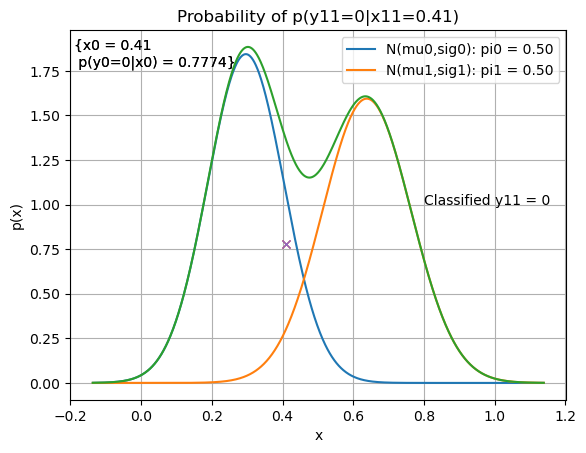

In [14]:
D = np.array([(0.44,0),(0.12,0),(0.26,0),(0.37,0),(0.29,0),(0.64,1),(0.55,1),(0.62,1),(0.87,1),(0.51,1)]);
plt.figure()
print("============================")
print("First set of Classified Data")
print("============================")
main(D)

Q6:

Second set of Classified Data
Answer for q4: the probability for p(y11 = 0 | x11 = 0.41) = 0.027


Answer for q5: the probability for p(y11 = 0 | x11 = 0.41) = 0.027
Answer for q5: the probability for p(y11 = 1 | x11 = 0.41) = 0.973
Classify y11 as y11 = 1




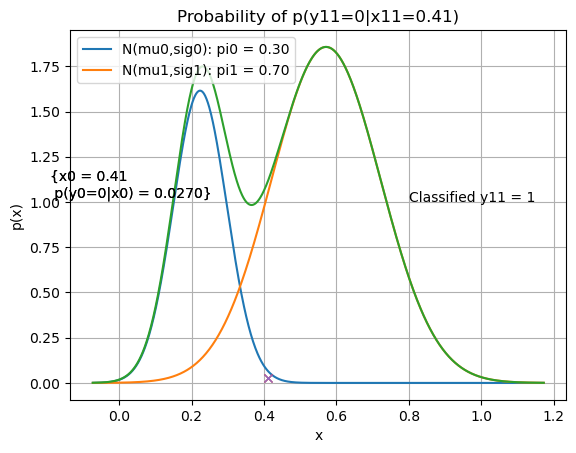

In [15]:
D_ = np.array([(0.44,1),(0.12,0),(0.26,0),(0.37,1),(0.29,0),(0.64,1),(0.55,1),(0.62,1),(0.87,1),(0.51,1)]);
plt.figure()
print("============================")
print("Second set of Classified Data")
print("============================")
main(D_)